mina ilkhani 610398191

HW5 PSO

import all we need for solving and visualizing:

In [1]:
import numpy as np
import random
import math

import matplotlib.pyplot as plt

problem:

In [2]:
XYMaxF = 10
XYMinF = -10
def f(x,y):
    return  abs( math.sin(x) * math.cos(y) * math.exp( abs( 1 - ( (math.sqrt( pow(x,2) + pow(y,2) ) ) / math.pi ) ) ) )

XYMaxG = 100
XYMinG = -100
def g(x,y):
    if x == 0 or math.cos(y/x) == -1:
        # return math.inf  #make problme for ploting. 
        return 41000       #if it be a very large number it would not look well
    return x * math.sin( math.pi * math.cos(x) * math.tan(y))  *  (math.sin(y/x)) / (1 + math.cos(y/x))

visualizing:

In [3]:
def point_visualizing(swarm,func,i) :
    xdata = []
    ydata = []
    zdata = []
    for p in swarm:
        xdata.append(p.currX[0])
        ydata.append(p.currX[1])
        zdata.append(func(p.currX[0],p.currX[1]))
    
    ax = plt.axes(projection='3d')
    ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis')
    plt.savefig('pic/'+func.__name__+str(i)+'.png')              #saving
                                                                   #very slow
    
def continuous_visualizing(func,maxX,minX,maxY,minY ):
    xdata = []
    ydata = []
    zdata = []

    for i in list(np.arange(minX,maxX,1/2)):
        for j in list(np.arange(minY,maxY,1/2)):
            xdata.append(i)
            ydata.append(j)
    for i in range(len(xdata)):
        zdata.append(func(xdata[i],ydata[i]))

    ax = plt.axes(projection='3d')
    ax.plot_trisurf(xdata, ydata, zdata, cmap='viridis')
    

Parameter variable:

omega, c1, c2, randmin, randmax (used in cal_next() in class particle)

GBlocation : (x,y) , GBest : z for global best (x,y,z)

n : number of particles

In [4]:
omega = 1/2   #Inertia
c1 = 1
c2 = 1
randMin = 0
randMax = 1
GBest = 0 # it will be inf for  minimizing and -inf for maximazing
GBlocation = tuple

n = 500


currX : x(k)

currV : v(k)

extermum can be min or max

cal_next_v:
  
    v(k) -> v(k+1)

    x(k) -> x(k+1)

    and update personal best


inertia = omega * v(k)

cognitive = c1 * rand * (Personal Best-x(k))

social = c2 * rand * (Global Best-x(k))

vi(k+1) = inertia + cognitive + social


let the location be int. I'll try float too

first self.currV is 0. we should try to keep currX in range ((maxX, minX), (maxY, minY)).usually personal & global best can't tend currX out of the range, but a radom currV can. So I prefer to use small currV in start, but I'll try other numbers.

outOfRange: i used it for fixing parameters(see in readme)

In [5]:
class particle:
    def __init__(self,maxX,minX,maxY,minY,func,extermum) :
        self.currX = (random.randint(minX,maxX), random.randint(minY, maxY))
        self.currV = (0,0)
        self.extermum = extermum
        self.func = func
        
        self.minX = minX
        self.maxX = maxX
        self.minY = minY
        self.maxY = maxY
        
        self.PBest = func(self.currX[0], self.currX[1])
        self.PBestlocation = self.currX
        
    def cal_next(self):
        rand1 = random.uniform(randMin, randMax)
        rand2 = random.uniform(randMin, randMax)
        
        interia    = (omega*self.currV[0],omega*self.currV[1])
        congnitive = c1*((self.PBestlocation[0]-self.currX[0])*rand1, (self.PBestlocation[1]-self.currX[1])*rand1 )
        social     = c2*((GBlocation[0]        -self.currX[0])*rand2, (GBlocation[1]        -self.currX[1])*rand2 )
        
        self.currV =  ( interia[0]+congnitive[0]+social[0] , interia[1]+congnitive[1]+social[1] )
        nextX  = (self.currX[0] + self.currV[0], self.currX[1] + self.currV[1])
        if self.minX<=nextX[0] and nextX[0]<=self.maxX and self.minY<=nextX[1] and nextX[1]<=self.maxY :
            self.currX = (self.currX[0] + self.currV[0], self.currX[1] + self.currV[1])
            
            
            if self.extermum == "min" :
                if self.func(self.currX[0], self.currX[1]) <= self.PBest :
                    self.PBest = self.func(self.currX[0], self.currX[1])
                    self.PBestlocation = self.currX
            elif self.extermum == "max" :
                if self.func(self.currX[0], self.currX[1]) >= self.PBest :
                    self.PBest = self.func(self.currX[0], self.currX[1])
                    self.PBestlocation = self.currX
        

visualize f

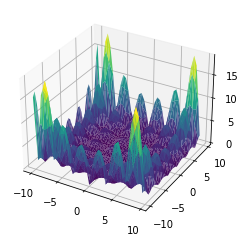

In [6]:
continuous_visualizing(f,XYMaxF, XYMinF, XYMaxF, XYMinF)

solving f:

In [7]:
GBest = -math.inf
swarm = np.array([particle(XYMaxF,XYMinF,XYMaxF,XYMinF,f,"max") for _ in range(n)])
i = 0
while GBest<=19.2:
    for p in swarm :
        pass
        if p.PBest > GBest:                              #I tried > too. there was no difference
            GBest = p.PBest
            GBlocation = p.PBestlocation
    for p in swarm :
        p.cal_next()

    i+=1
print(GBest,i)
print(GBlocation)

19.207754835765368 2
(8.04876100558586, -9.658672960898983)


visualize g

In [8]:
# continuous_visualizing(g,XYMaxG, XYMinG, XYMaxG, XYMinG)

In [9]:
GBest = math.inf
swarm = np.array([particle(XYMaxG,XYMinG,XYMaxG,XYMinG,g,"min") for _ in range(n)])
i = 0
# import time
# curr = time.perf_counter()
while i<1000:
    for p in swarm :
        if p.PBest < GBest:                              #I tried > too. there was no difference
            GBest = p.PBest
            GBlocation = p.PBestlocation
            # print(GBest,i, time.perf_counter()-curr)
            print(GBest,i)
            # point_visualizing(swarm, g, i)
            
    for p in swarm :
        p.cal_next()

    i+=1
print("=======================")
print(GBest)
print(GBlocation)

-22.897880127273286 0
-40.75695260524038 0
-85.27344147305777 0
-325.45297906285515 0
-376.5126193587455 0
-568.044283288566 1
-1642.3519323725209 1
-3598.4121523600666 1
-5020.101458301629 2
-6440.624829158789 2
-11466.370977476392 2
-57257.39629648294 3
-68655.7604969388 8
-94853.70576182155 10
-146883.8918125811 10
-170475.98987969317 12
-440094.22720756015 12
-680692.8275204002 13
-1674980.0223948515 14
-5293103.944313808 17
-6930349.653272171 20
-11834049.149374146 20
-29442628.293095514 21
-61967644.32768595 23
-70773470.42129906 24
-118536328.3368623 27
-129751593.64349538 29
-678572778.3263985 30
-1725681627.7543929 33
-3999908908.6247387 34
-4024468720.6208553 42
-4113659238.554319 46
-4160497450.862621 53
-4305860277.535926 58
-4396948942.04881 59
-4446031749.665523 59
-4638350329.6536045 59
-4748000544.599109 59
-4869705527.335743 59
-4871668827.885798 60
-4895366184.815252 60
-4960915197.895796 61
-4961667698.384389 61
-4961917617.891823 61
-4979945117.087629 61
-4991492538

create gif
one time whole imgs are for f and other time are g

In [10]:
# from PIL import Image
# import glob

# frames = []
# imgs = glob.glob("*.png")
# for i in imgs:
#     new_frame = Image.open(i)
#     frames.append(new_frame)

# frames[0].save('g-f.gif', format='GIF', append_images=frames[1:], save_all=True, duration=1000, loop=1)

In [11]:
print ('%.50f'%GBlocation[0],'%.50f'%GBlocation[1])

30.39353986742749569316401903051882982254028320312500 -95.48412100941294511358137242496013641357421875000000
